# **machine learning libraries and packages experimental setup**
  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import time


In [2]:
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Choice of dataset - Data Mining**


In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/ML/House Prices/boston.xlsx'


In [6]:
boston_data = pd.read_excel(file_path)
print(boston_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [7]:
print(boston_data.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [8]:
boston_data.shape

(506, 14)

In [9]:
# Displaying statistical information about the dataset
print(boston_data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [10]:
# Information about data types and non-null counts
print(boston_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


# **Correlation Analysis:**
To check how each feature correlates with the target variable

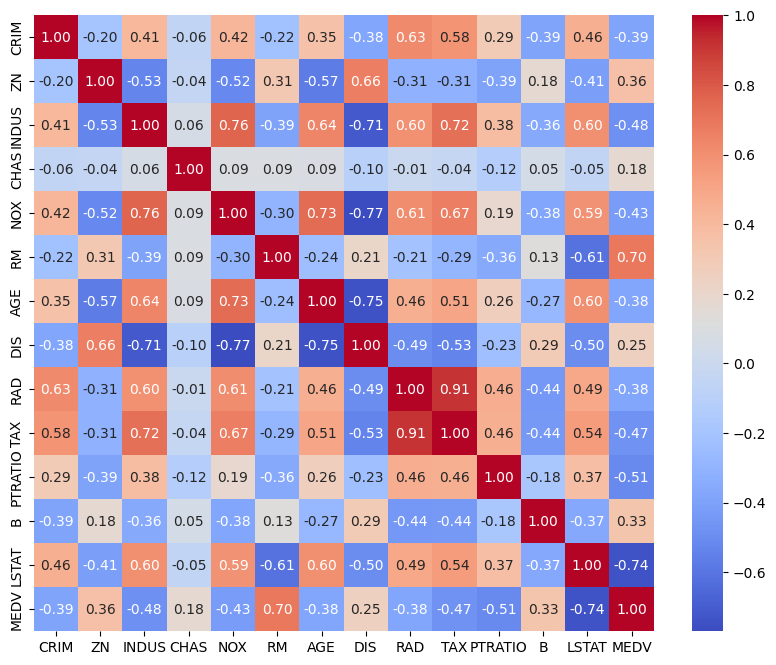

In [11]:
# Calculate the correlation matrix
corr_matrix = boston_data.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

# **Splitting the Data into Training and Testing Sets**


In [12]:
X = boston_data.drop('MEDV', axis=1) # Features
y = boston_data['MEDV']              # Target


In [13]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Normalization**


In [14]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Choice of machine learning techniques ( 3 techniques)**


# **Optimization/Parametrization**


# **Models Training**

# **1- Linear Regression**

In [15]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

# **2- Support Vector Regression (SVR)**


In [16]:
# SVR hyperparameter tuning
parameters_svr = {'C': [1.3, 1.0], 'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.5]}
svr_regressor = RandomizedSearchCV(SVR(kernel='rbf'), parameters_svr, n_iter=8, cv=5, scoring='neg_mean_squared_error', random_state=42)
svr_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=8,
                   param_distributions={'C': [1.3, 1.0], 'epsilon': [0.1, 0.5],
                                        'gamma': ['scale', 'auto']},
                   random_state=42, scoring='neg_mean_squared_error')

In [17]:
# After fitting RandomizedSearchCV for SVR
print("Best parameters for SVR:", svr_regressor.best_params_)


Best parameters for SVR: {'gamma': 'scale', 'epsilon': 0.1, 'C': 1.3}


# **3- K-Nearest Neighbors (KNN)**


In [18]:
# KNN
parameters_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_regressor = GridSearchCV(KNeighborsRegressor(), parameters_knn, cv=5, scoring='neg_mean_squared_error')
knn_regressor.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [19]:

# Print the best parameters found by GridSearchCV
print("Best Parameters for KNN:", knn_regressor.best_params_)

Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}


# **Evaluate the performance of the machine learning methods any 3 metrics**

# **Evaluate Model**

In [20]:
# Predictions
lin_predictions = lin_reg.predict(X_test)
svr_predictions = svr_regressor.best_estimator_.predict(X_test)
knn_predictions = knn_regressor.best_estimator_.predict(X_test)

# Calculate the metrics for each model
lin_mse = mean_squared_error(Y_test, lin_predictions)
lin_mae = mean_absolute_error(Y_test, lin_predictions)
lin_r2 = r2_score(Y_test, lin_predictions)


svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)


knn_mse = mean_squared_error(Y_test, knn_predictions)
knn_mae = mean_absolute_error(Y_test, knn_predictions)
knn_r2 = r2_score(Y_test, knn_predictions)


# Create a dictionary with the model names and their corresponding metrics
model_metrics = {
    'Model': ['Linear Regression', 'Support Vector Regression', 'K-Nearest Neighbors'],
    'MSE': [lin_mse, svr_mse, knn_mse],
    'MAE': [lin_mae, svr_mae, knn_mae],
    'R2': [lin_r2, svr_r2, knn_r2],
}

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(comparison_df)


                       Model        MSE       MAE        R2
0          Linear Regression  24.291119  3.189092  0.668759
1  Support Vector Regression  52.181160  4.487016  0.288443
2        K-Nearest Neighbors  27.214531  3.616678  0.628895


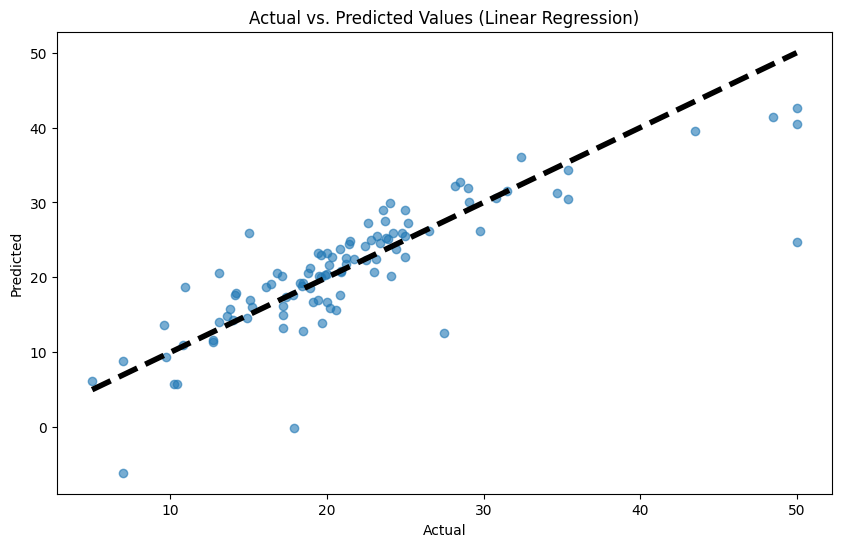

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, lin_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()


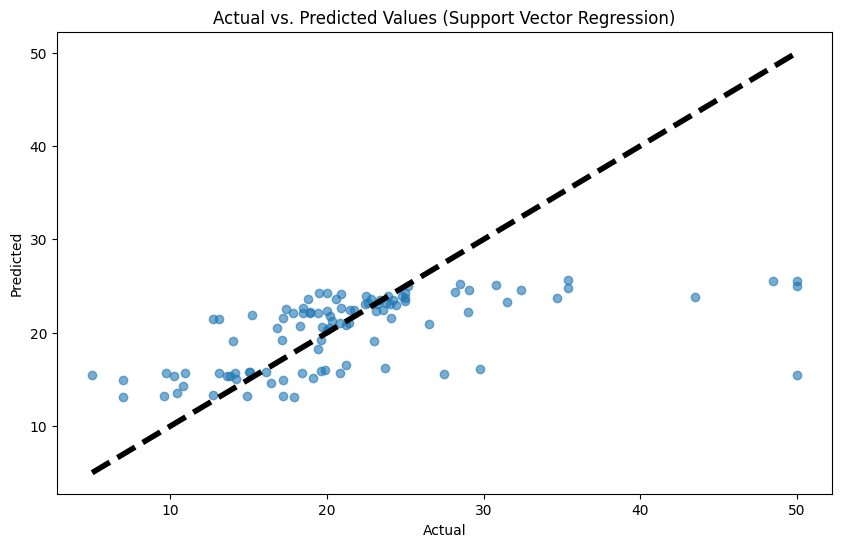

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, svr_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Support Vector Regression)')
plt.show()


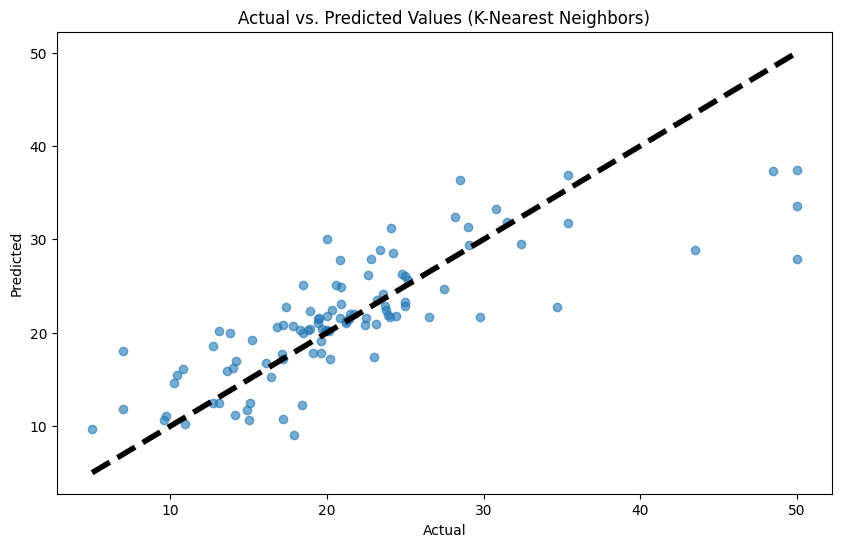

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, knn_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors)')
plt.show()
